# Cursos de Series de tiempo con *Machine Learning*
## Modulo 19. Modelo de Arbol de Decision
                        Elaborado por: Naren Castellon

## 🧪 Caso de Estudio: Pronóstico de Ventas Semanales de Suplementos de Salud (2020–2025)

Este conjunto de datos contiene datos de ventas semanales de diversos suplementos para la salud y el bienestar desde enero de 2020 hasta abril de 2025. Los datos incluyen productos en categorías como Proteínas, Vitaminas, Omega y Aminoácidos, entre otras, y abarcan múltiples plataformas de comercio electrónico como Amazon, Walmart e iHerb. El conjunto de datos también registra las ventas en varios lugares, incluyendo EE. UU., Reino Unido y Canadá.

El creciente interés global por la salud y el bienestar ha impulsado un notable aumento en el consumo de suplementos nutricionales. En este contexto, disponer de herramientas analíticas que permitan anticipar la demanda resulta vital para optimizar la planificación de inventario, diseño de promociones y distribución multicanal. Este caso de estudio propone el desarrollo de un modelo de *forecasting* de ventas que permita anticipar la demanda semanal de suplementos de diversas categorías y plataformas de venta.

---

### 📂 Descripción de los Datos

El conjunto de datos abarca el período comprendido entre enero de 2020 y abril de 2025 e incluye registros de ventas semanales de suplementos clasificados por:


- **Fecha:** Semana de la oferta.

- **Nombre del Producto:** Nombre del suplemento (p. ej., Proteína de Suero, Vitamina C, etc.).

- **Categoría:** Categoría del suplemento (p. ej., Proteína, Vitamina, Omega).

- **Unidades vendidas:** Número de unidades vendidas esa semana.

- **Precio:** Precio de venta del producto.

- **Ingresos:** Ingresos totales generados (Unidades vendidas * Precio).

- **Descuento:** Descuento aplicado al producto (como porcentaje del precio original).

- **Unidades devueltas:** Número de unidades devueltas esa semana.

- **Ubicación:** Ubicación de la venta (EE. UU., Reino Unido o Canadá).

- **Plataforma:** Plataforma de comercio electrónico (Amazon, Walmart, iHerb).

---

## Casos de uso
Este conjunto de datos es ideal para:

- Pronóstico de series temporales y análisis de tendencias de ventas 📈

- Análisis de precio vs. demanda y predicción de ingresos 📊

- Análisis de sentimiento e impacto de las promociones (descuentos) en las ventas 🛍️

- Seguimiento del rendimiento de productos en diferentes plataformas y ubicaciones 🛒

- Optimización empresarial en el sector del comercio electrónico de salud y bienestar 💼

---

### 🎯 Objetivos del Caso de Estudio

- Realizar un **forecasting preciso de las ventas semanales** de suplementos para anticipar la demanda a nivel general y por categoría.
- Probar diferentes enfoques de modelado para comparar su rendimiento:
  - 📈 Modelos estadísticos clásicos: ARIMA, Exponential Smoothing
  - 🤖 Modelos de aprendizaje automático: Random Forest, XGBoost
  - ⏱️ Modelos multivariados o multiseries: Prophet, VAR, LSTM
- Evaluar el impacto de tendencias, estacionalidad y eventos externos sobre el comportamiento de ventas.

---

### 🔄 Pasos Propuestos para el Desarrollo del Caso

1. **Exploración de los Datos**
   - Análisis de estacionalidad, tendencias y patrones por categoría y canal
   - Visualización de la evolución de ventas semanales

2. **Preprocesamiento**
   - Relleno o tratamiento de valores faltantes
   - Ajuste de fechas y resampleo para una estructura uniforme
   - Ingeniería de variables (e.g. mes, semana, feriados, promociones)

3. **División del conjunto de datos**
   - Entrenamiento (ej: 2020–2023) y prueba (ej: 2024 en adelante)
   - Validación temporal (time series cross-validation si aplica)

4. **Entrenamiento de modelos**
   - Ajuste de modelos ARIMA/SARIMA por categoría
   - Implementación de Prophet para series individuales
   - Construcción de modelos XGBoost o Random Forest con variables exógenas

5. **Evaluación de resultados**
   - Métricas: MAE, RMSE, MAPE, sMAPE
   - Visualización del error y comparación con ventas reales
   - Selección del modelo más robusto por criterio general o por producto

6. **Proyección y visualización**
   - Generar forecast para los próximos 3–6 meses
   - Crear dashboards con gráficos de línea, bandas de confianza y alertas

---

### Aplicaciones potenciales

- Crear modelos predictivos para pronosticar ventas futuras 📅

- Analizar la efectividad de descuentos y promociones 💸

- Crear sistemas de recomendación para suplementos 🧠

- Realizar análisis exploratorios de datos (EDA) y descubrir tendencias 🔍

- Modelar las tasas de retorno y su efecto en los ingresos generales 📉

---
### 📌 Recomendaciones y Consideraciones

- **Segmentación Inteligente**: agrupar productos con patrones similares puede mejorar el rendimiento del modelo.
- **Impacto de eventos exógenos**: feriados, pandemias o cambios logísticos pueden afectar las ventas. Incluir estas variables mejora la precisión.
- **Mantenimiento del modelo**: actualizar periódicamente los datos y reentrenar el modelo garantiza su relevancia a lo largo del tiempo.
- **Evaluación continua**: monitorear el rendimiento del modelo con nuevas observaciones y ajustar parámetros cuando sea necesario.
- **Visualización clara**: comunicar los resultados a equipos no técnicos es clave para la toma de decisiones empresariales.


# <p style="padding:10px;background-color: green ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importar librerias</p>


In [1]:
# Manipulación y procesamiento de Datos
# ==============================================================================
import pandas as pd
import numpy as np

# Plot - Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# No presentar advertencia
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# <p style="padding:10px;background-color: green ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Cargar Dataset</p>


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/Supplement_Sales_Weekly_Expanded.csv")
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [3]:
df.tail()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon
4383,2025-03-31,Electrolyte Powder,Hydration,178,39.12,6963.36,0.23,0,UK,iHerb


# <p style="padding:10px;background-color:green ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA</p>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [5]:
df.columns

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform'],
      dtype='object')

In [6]:
df['Category'].value_counts()

Category
Vitamin        822
Mineral        822
Protein        548
Performance    548
Omega          274
Amino Acid     274
Herbal         274
Sleep Aid      274
Fat Burner     274
Hydration      274
Name: count, dtype: int64

In [7]:
df['Product Name'].value_counts()

Product Name
Whey Protein          274
Vitamin C             274
Fish Oil              274
Multivitamin          274
Pre-Workout           274
BCAA                  274
Creatine              274
Zinc                  274
Collagen Peptides     274
Magnesium             274
Ashwagandha           274
Melatonin             274
Biotin                274
Green Tea Extract     274
Iron Supplement       274
Electrolyte Powder    274
Name: count, dtype: int64

In [8]:
df["Platform"].value_counts()

Platform
iHerb      1499
Amazon     1473
Walmart    1412
Name: count, dtype: int64

Revisemos si tenemos valores nulos

In [9]:
df.isna().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Units Sold,4384.0,150.200274,12.396099,103.0,142.0000,150.00,158.0000,194.00
Price,4384.0,34.781229,14.198309,10.0,22.5975,34.72,46.7125,59.97
Revenue,4384.0,5226.569446,2192.491946,1284.0,3349.3725,5173.14,7009.9600,10761.85
Discount,4384.0,0.124398,0.071792,0.0,0.0600,0.12,0.1900,0.25
Units Returned,4384.0,1.531478,1.258479,0.0,1.0000,1.00,2.0000,8.00


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
15,2020-01-06,Electrolyte Powder,Hydration,154,35.92,5531.68,0.04,2,USA,Amazon
14,2020-01-06,Iron Supplement,Mineral,149,42.97,6402.53,0.22,2,Canada,iHerb
13,2020-01-06,Green Tea Extract,Fat Burner,143,31.88,4558.84,0.06,3,UK,Walmart
12,2020-01-06,Biotin,Vitamin,159,28.79,4577.61,0.10,1,UK,iHerb
...,...,...,...,...,...,...,...,...,...,...
4369,2025-03-31,Vitamin C,Vitamin,157,57.08,8961.56,0.20,2,UK,iHerb
4368,2025-03-31,Whey Protein,Protein,148,15.17,2245.16,0.07,1,UK,Amazon
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon
4374,2025-03-31,Creatine,Performance,174,35.63,6199.62,0.03,0,Canada,Amazon


In [12]:
df.dtypes

Date              datetime64[ns]
Product Name              object
Category                  object
Units Sold                 int64
Price                    float64
Revenue                  float64
Discount                 float64
Units Returned             int64
Location                  object
Platform                  object
dtype: object

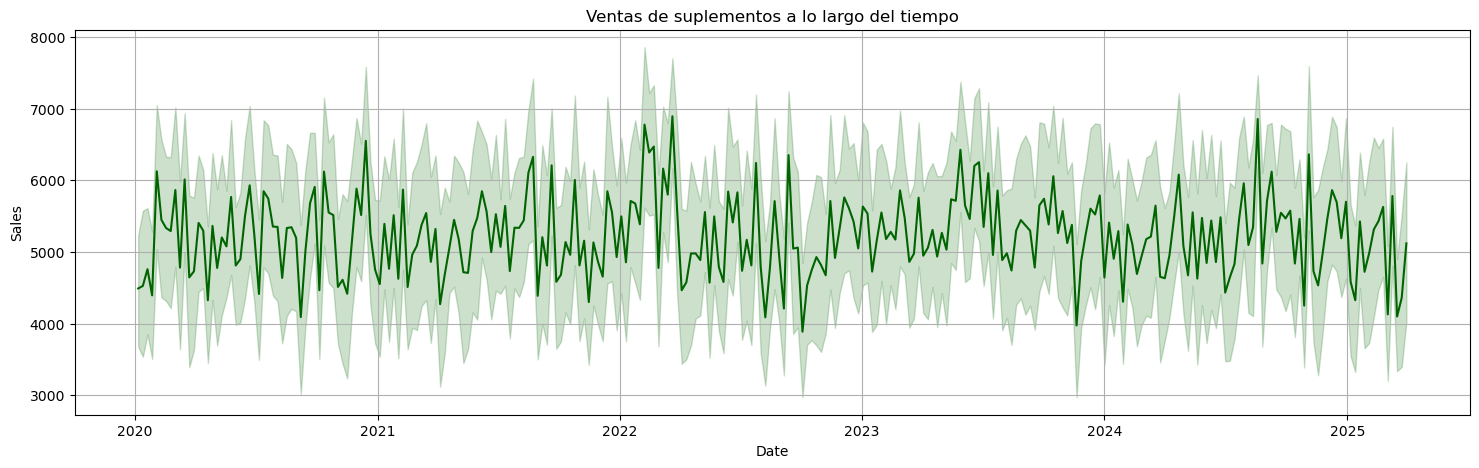

In [13]:
plt.figure(figsize=(18, 5))
#df_price=df.groupby('Date')['Price'].sum().reset_index()
sns.lineplot(x='Date',y='Revenue',data = df,color='darkgreen')
plt.title('Ventas de suplementos a lo largo del tiempo')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [14]:
top_products = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False)
top_products

Product Name
Biotin                1486798.62
Zinc                  1482546.95
Pre-Workout           1477183.78
BCAA                  1464819.63
Fish Oil              1451065.87
Green Tea Extract     1440900.05
Collagen Peptides     1433297.24
Creatine              1432518.40
Iron Supplement       1431582.41
Whey Protein          1422194.85
Vitamin C             1421998.07
Electrolyte Powder    1411951.38
Ashwagandha           1405700.79
Melatonin             1397315.79
Multivitamin          1391427.99
Magnesium             1361978.63
Name: Revenue, dtype: float64

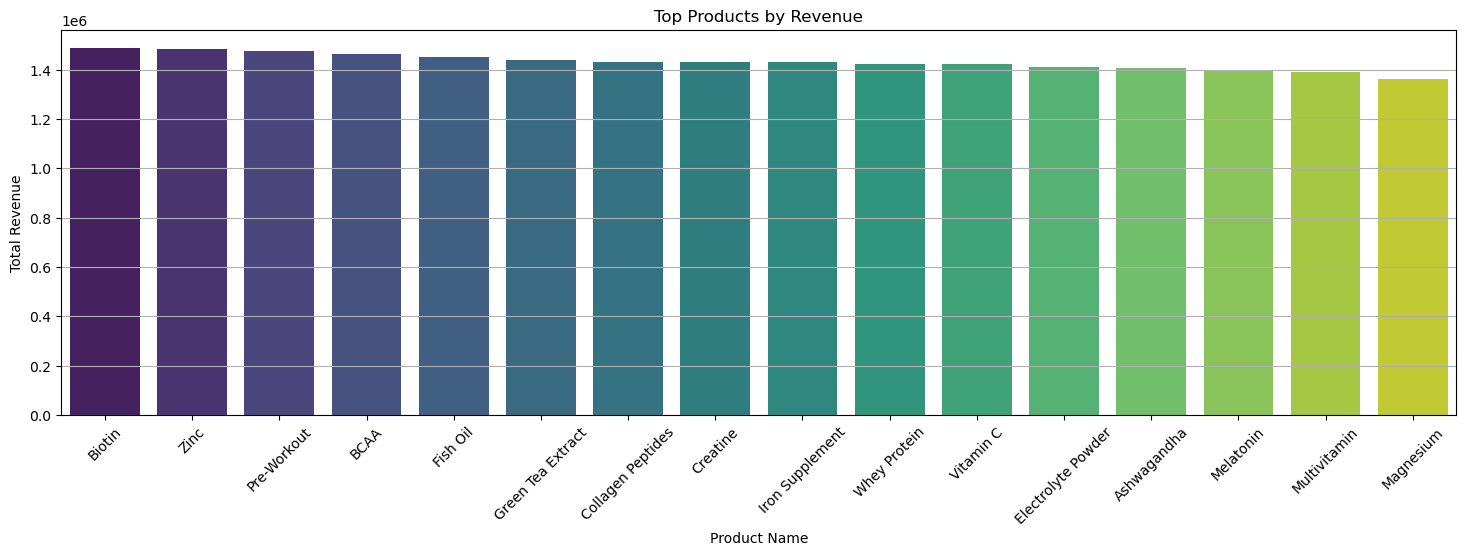

In [15]:
plt.figure(figsize=(18, 5))

idx=top_products.index
vals=top_products.values
sns.barplot(x=idx,y=vals,palette='viridis')

plt.title("Top Products by Revenue")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.grid(axis='y')
plt.show()

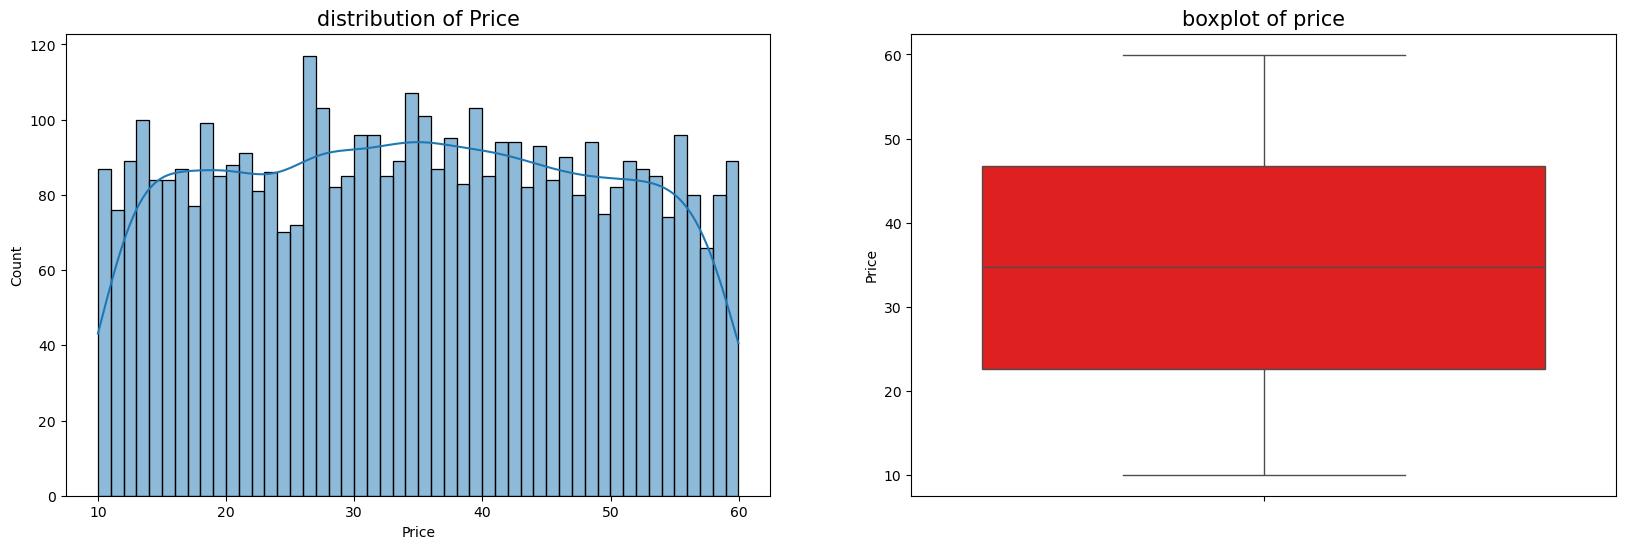

In [16]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.histplot(x=df['Price'],bins=50,kde=True)
plt.title('distribution of Price',fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(y=df['Price'],color='red')
plt.title('boxplot of price',fontsize=15)

plt.show()

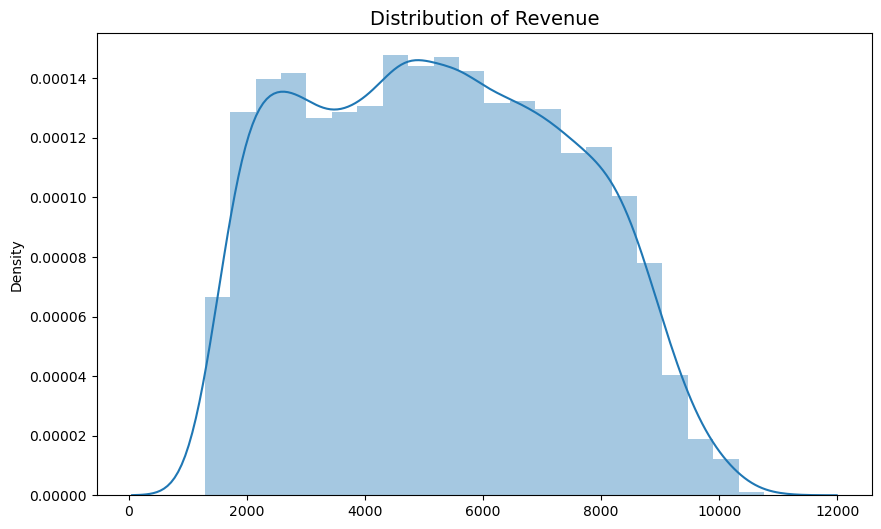

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(x=df['Revenue'])
plt.title('Distribution of Revenue', fontsize=14)
plt.show()

In [18]:
df['Category'].value_counts().sort_values()


Category
Hydration      274
Fat Burner     274
Herbal         274
Sleep Aid      274
Amino Acid     274
Omega          274
Protein        548
Performance    548
Mineral        822
Vitamin        822
Name: count, dtype: int64

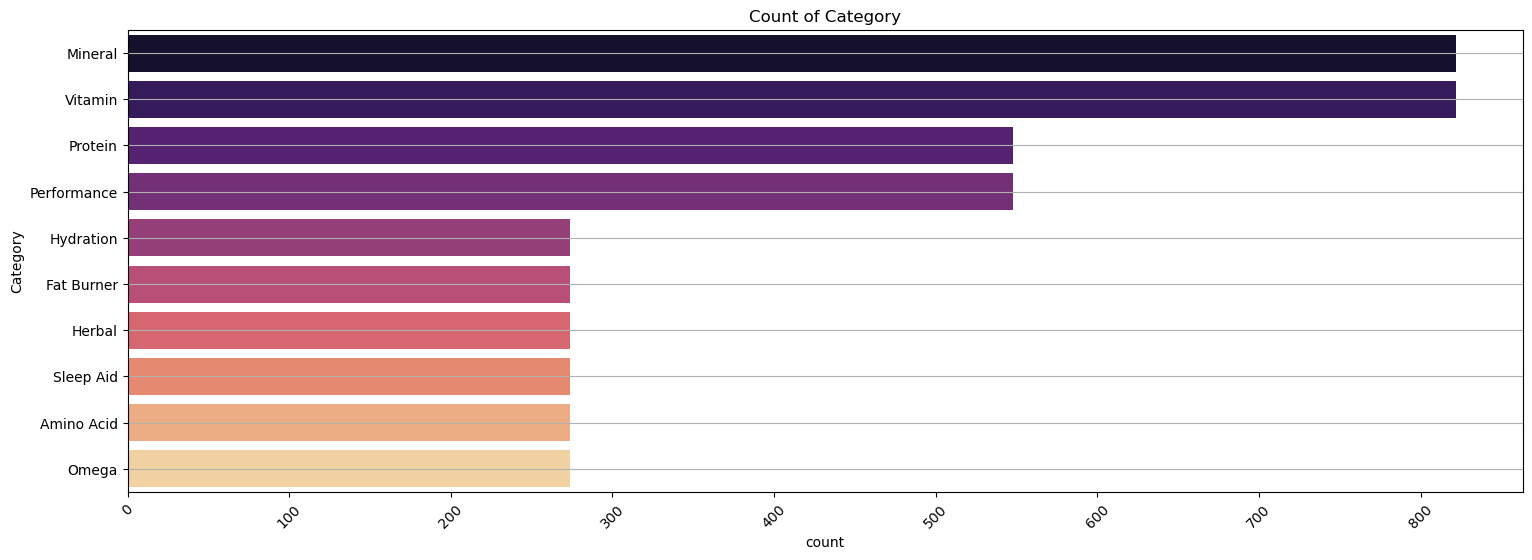

In [19]:
plt.figure(figsize=(18,6))
sns.countplot(y=df['Category']
              ,palette='magma',
              order=df['Category'].value_counts().index

             )
plt.xticks(rotation=45)
plt.title('Count of Category')
plt.grid(True,axis='y')

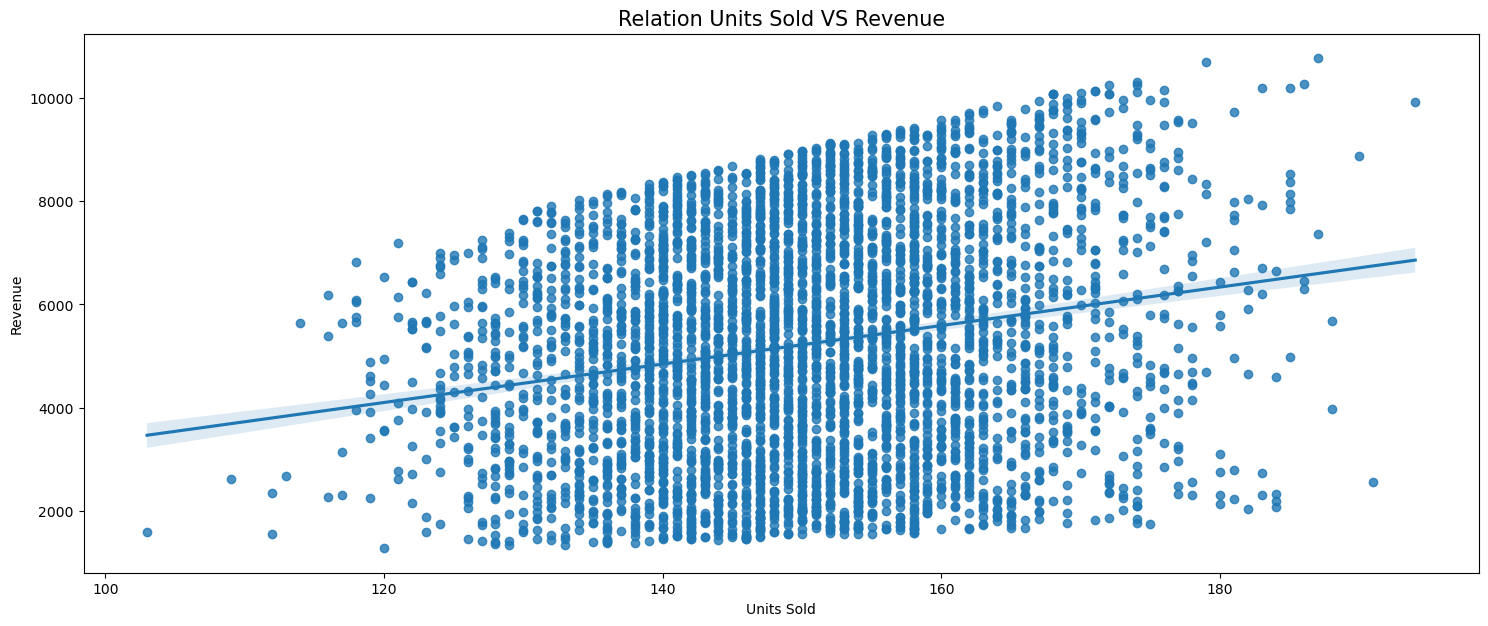

In [20]:
sns.regplot(x='Units Sold',y='Revenue',data=df) 
plt.title("Relation Units Sold VS Revenue",fontsize=15)
plt.show()

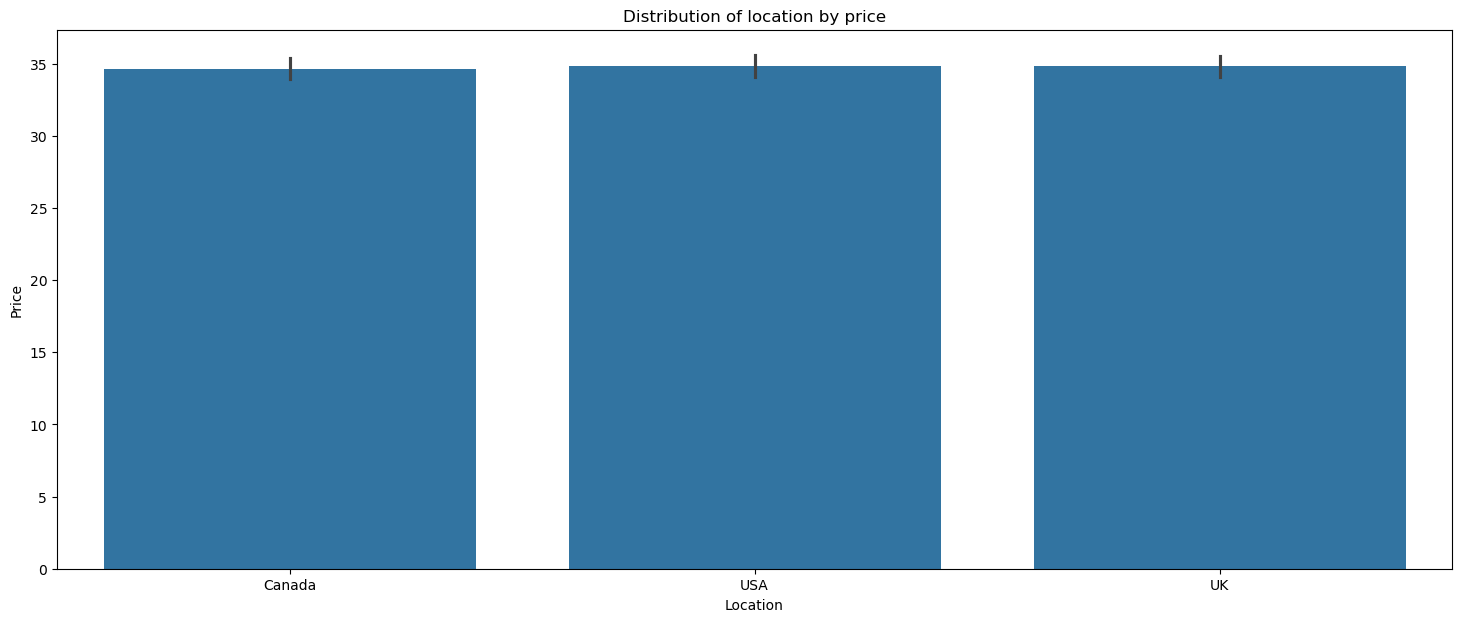

In [21]:
sns.barplot(x='Location',y='Price',data=df)
plt.title("Distribution of location by price")
plt.show()

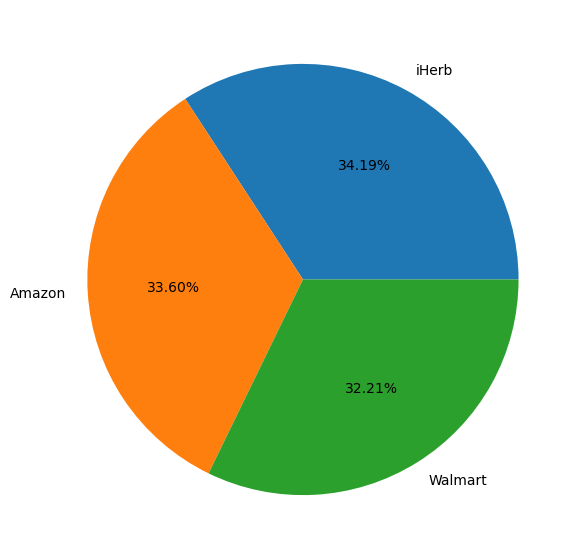

In [22]:
# pie plot
df['Platform'].value_counts()
plt.pie(df['Platform'].value_counts().values,
        labels=df['Platform'].value_counts().index,
        autopct="%.2f%%"
)
plt.show()

# <p style="padding:10px;background-color: green ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Análisis de Correlación</p>

In [23]:
corr = df[["Units Sold", "Price","Revenue","Discount","Units Returned"]].corr()
corr

,Units Sold,Price,Revenue,Discount,Units Returned
Units Sold,1.000000,0.013749,0.210462,-0.010435,0.116523
Price,0.013749,1.000000,0.977198,-0.008668,-0.010410
Revenue,0.210462,0.977198,1.000000,-0.012531,0.012432
Discount,-0.010435,-0.008668,-0.012531,1.000000,0.004276
Units Returned,0.116523,-0.010410,0.012432,0.004276,1.000000


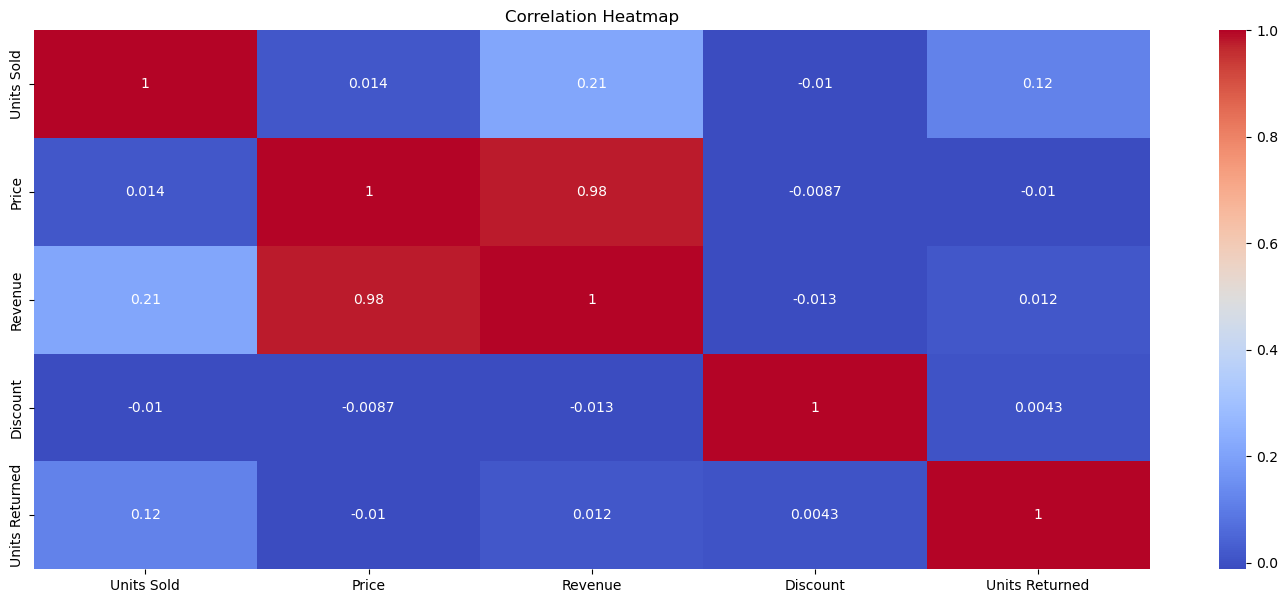

In [24]:
sns.heatmap(corr,annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# <p style="padding:10px;background-color: green ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Análisis Mensual</p>

Que tipo de  `Forecast`puedo realizar...!!!

1. Realizar forecast de ventas totales(Revenue)
2. Realizar forecast de las unidades vendidas(Units Sold)
3. Realizar forecast de las unidades devueltas(Units Returned)
4. Combinar los productos con cada uno de las anteriores.
5. Realizar forecast de las plataformas con cada una de las primeras forecast.

In [25]:
df

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
15,2020-01-06,Electrolyte Powder,Hydration,154,35.92,5531.68,0.04,2,USA,Amazon
14,2020-01-06,Iron Supplement,Mineral,149,42.97,6402.53,0.22,2,Canada,iHerb
13,2020-01-06,Green Tea Extract,Fat Burner,143,31.88,4558.84,0.06,3,UK,Walmart
12,2020-01-06,Biotin,Vitamin,159,28.79,4577.61,0.10,1,UK,iHerb
...,...,...,...,...,...,...,...,...,...,...
4369,2025-03-31,Vitamin C,Vitamin,157,57.08,8961.56,0.20,2,UK,iHerb
4368,2025-03-31,Whey Protein,Protein,148,15.17,2245.16,0.07,1,UK,Amazon
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon
4374,2025-03-31,Creatine,Performance,174,35.63,6199.62,0.03,0,Canada,Amazon


In [26]:
df["Product Name"].nunique()

16

In [27]:
df["Monthly"] = df["Date"].dt.to_period("M")
monthly = df.groupby("Monthly").agg({
    "Revenue":"sum",
    "Units Sold":"sum",
    "Discount":"mean",
    "Units Returned":"sum"
}).reset_index()

In [28]:
monthly

,Monthly,Revenue,Units Sold,Discount,Units Returned
0,2020-01,290723.89,9547,0.120313,101
1,2020-02,355213.26,9493,0.128125,91
2,2020-03,416547.17,12145,0.111375,123
3,2020-04,326287.92,9605,0.138281,91
4,2020-05,333210.99,9557,0.119375,90
...,...,...,...,...,...
58,2024-11,329894.33,9838,0.117813,106
59,2024-12,446728.99,12042,0.127125,99
60,2025-01,304965.15,9617,0.125156,92
61,2025-02,341768.25,9542,0.128125,103


In [29]:
monthly["Monthly"] = monthly["Monthly"].astype(str)

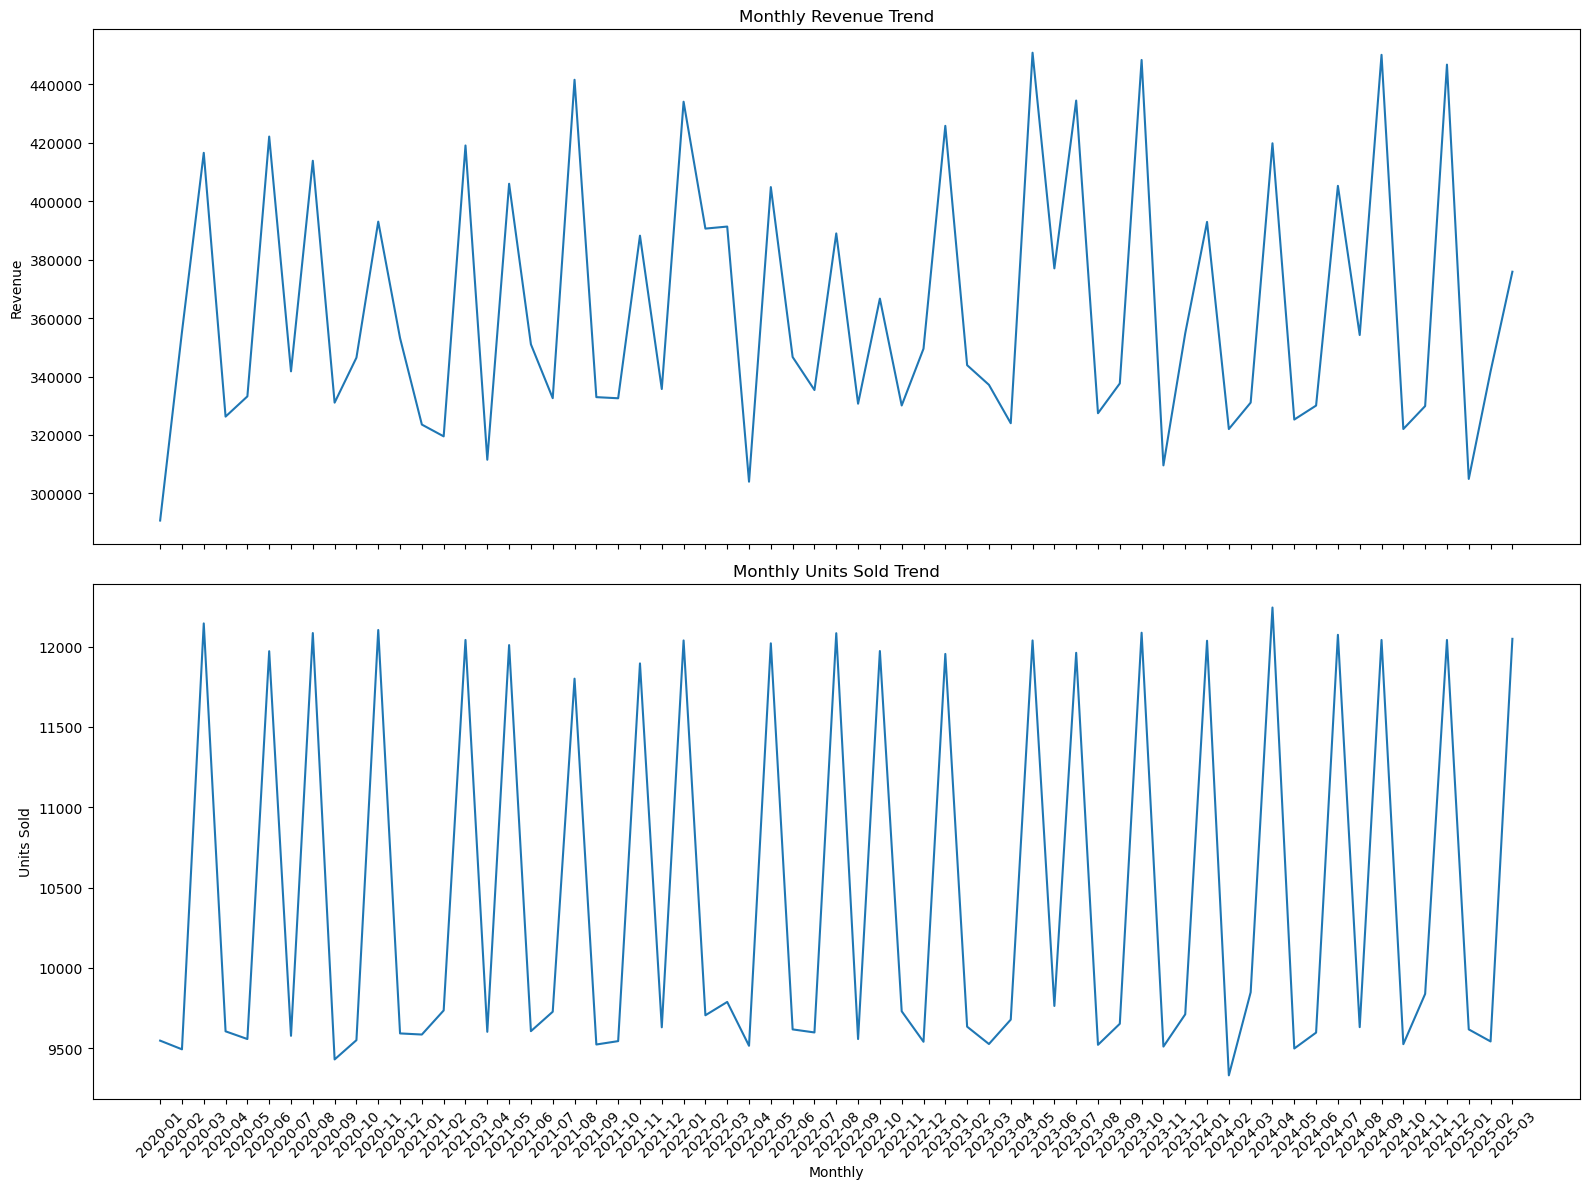

In [30]:
fig, axes = plt.subplots(2,1,sharex=True,figsize=(16,12))
sns.lineplot(data=monthly, x="Monthly", y="Revenue", ax= axes[0])
axes[0].set_title("Monthly Revenue Trend")
axes[0].tick_params(axis="x", rotation=45)

sns.lineplot(data=monthly, x="Monthly", y="Units Sold", ax= axes[1])
axes[1].set_title("Monthly Units Sold Trend")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# <p style="padding:10px;background-color: green ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Time Series</p>

In [31]:
df

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Monthly
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,2020-01
15,2020-01-06,Electrolyte Powder,Hydration,154,35.92,5531.68,0.04,2,USA,Amazon,2020-01
14,2020-01-06,Iron Supplement,Mineral,149,42.97,6402.53,0.22,2,Canada,iHerb,2020-01
13,2020-01-06,Green Tea Extract,Fat Burner,143,31.88,4558.84,0.06,3,UK,Walmart,2020-01
12,2020-01-06,Biotin,Vitamin,159,28.79,4577.61,0.10,1,UK,iHerb,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
4369,2025-03-31,Vitamin C,Vitamin,157,57.08,8961.56,0.20,2,UK,iHerb,2025-03
4368,2025-03-31,Whey Protein,Protein,148,15.17,2245.16,0.07,1,UK,Amazon,2025-03
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon,2025-03
4374,2025-03-31,Creatine,Performance,174,35.63,6199.62,0.03,0,Canada,Amazon,2025-03


In [32]:
weekly_sales = df.groupby('Date')['Revenue'].sum()

In [33]:
weekly_sales.sort_values(ascending=False)

Date
2022-03-21    110304.05
2024-08-19    109691.20
2022-02-07    108433.74
2020-12-14    104811.96
2022-02-21    103541.41
                ...    
2025-03-17     65590.53
2020-09-07     65463.22
2022-08-08     65409.49
2023-11-20     63586.90
2022-10-03     62197.99
Name: Revenue, Length: 274, dtype: float64

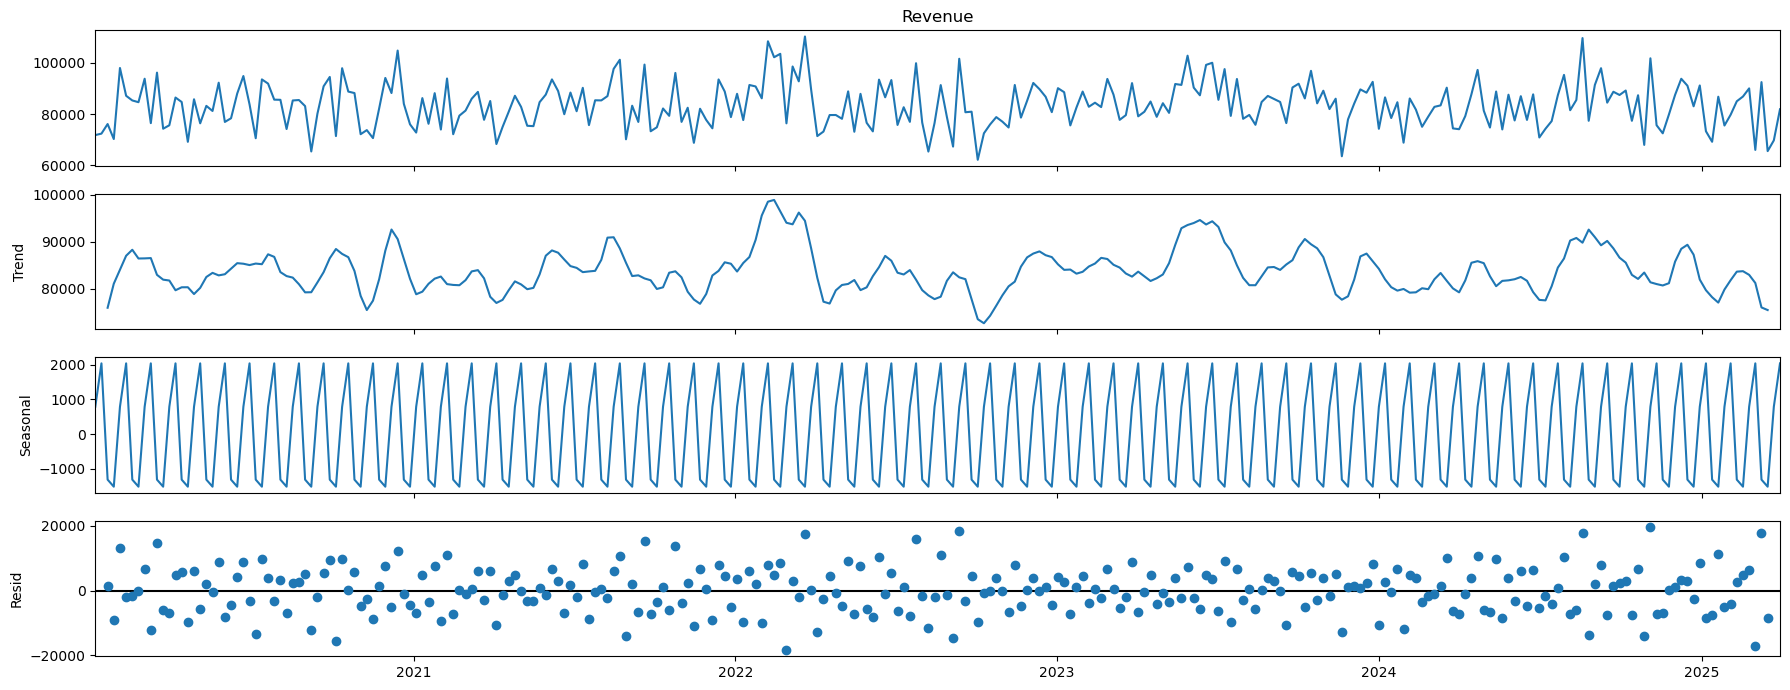

In [34]:
# Decompose the time series
result = seasonal_decompose(weekly_sales, model='additive', period=4) 
result.plot()
plt.show()

## `Estacionariedad`

- Vamos a implementar la prueba inferencia `Dickey fuller Aumented`.

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Prueba Dickey Fuller
from statsmodels.tsa.stattools import adfuller
from numpy import log
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05: # P - Values
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [36]:
Augmented_Dickey_Fuller_Test_func(weekly_sales,"Suplementos")

Resultados de la prueba de Dickey-Fuller para columna: Suplementos
Test Statistic                       -7.224319e+00
p-value                               2.072076e-10
No Lags Used                          3.000000e+00
Número de observaciones utilizadas    2.700000e+02
Critical Value (1%)                  -3.454804e+00
Critical Value (5%)                  -2.872305e+00
Critical Value (10%)                 -2.572506e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


Se puede observa que $p-\text{valor} = 2.072076e-10$  es menor que que el $5%$, lo cual tenemos suficiente evidencia que la series de temporal es estacionaria.

In [37]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de analisys de Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

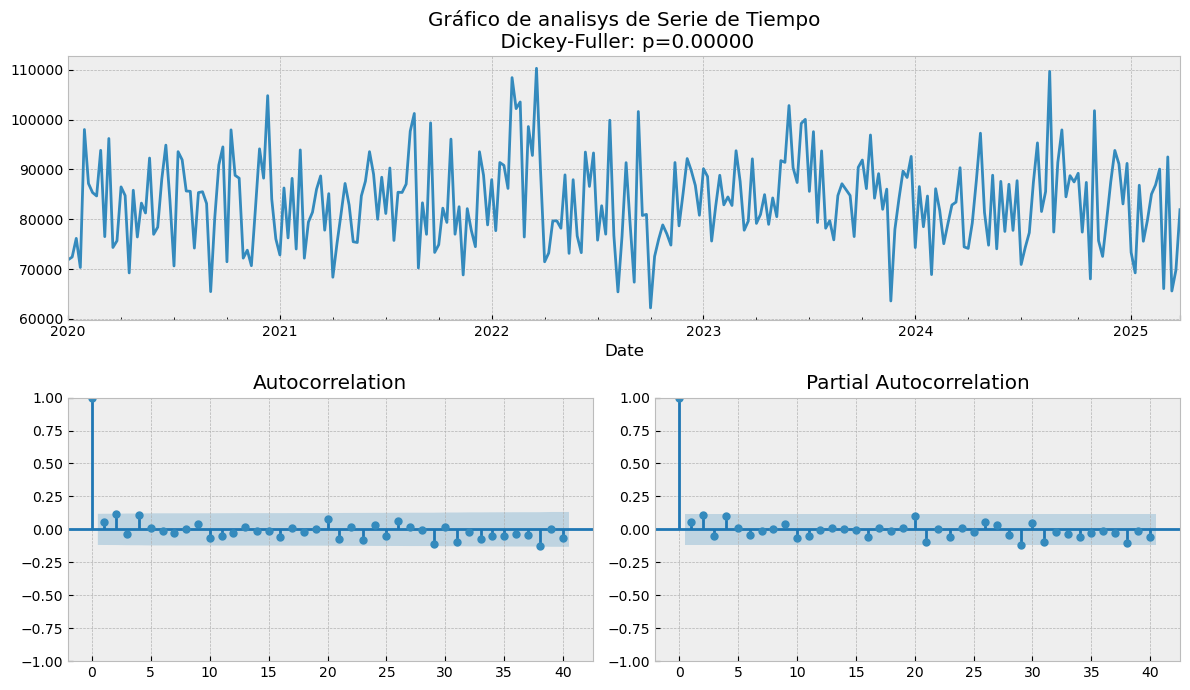

In [38]:
tsplot(weekly_sales, lags = 40);

- Pasa conocer los terminos que AR(p) que lleva el modelo, necesitamos usar el grafico de la autocorrelación parcial (PACF)

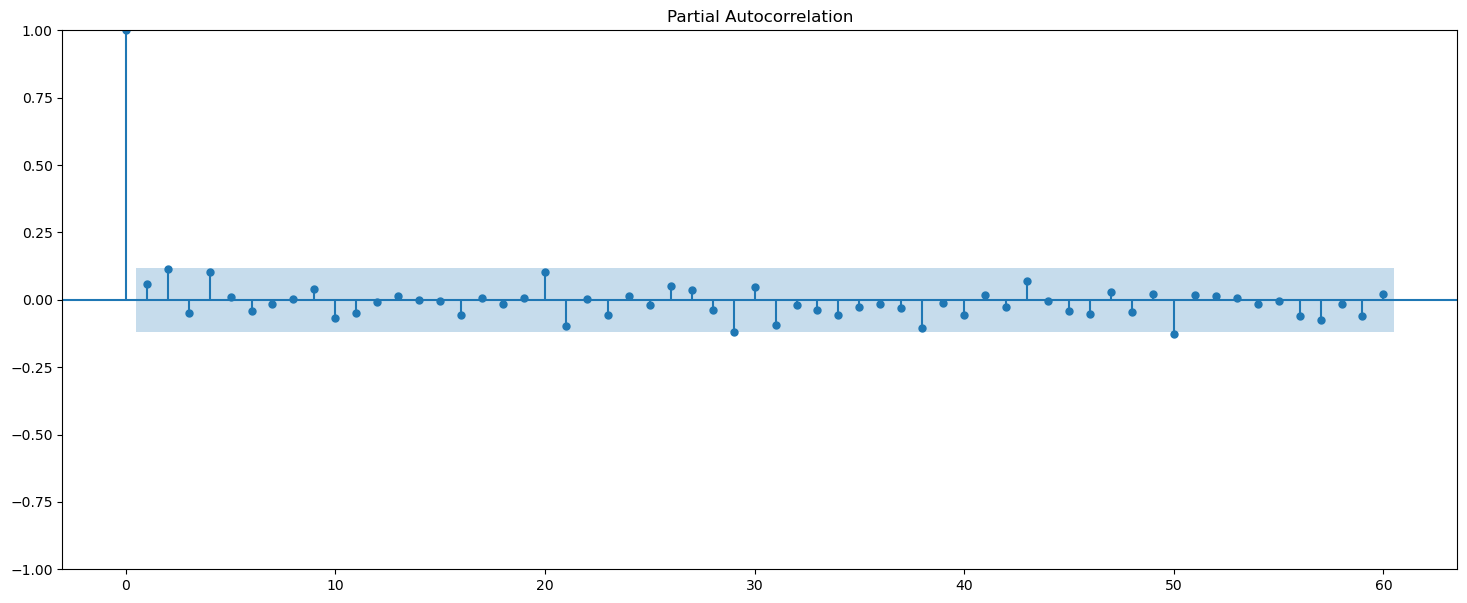

In [38]:
plot_pacf(weekly_sales,  lags = 60,);

## `Modelo AR`

**El Modelo AR(p): Fundamentos, Aplicaciones y Relevancia en el Pronóstico de Series Temporales**

El modelo autoregresivo de orden $ p $, conocido como `AR(p)`, es una herramienta fundamental en el análisis y pronóstico de series temporales. Ampliamente utilizado en disciplinas como la economía, las finanzas, la meteorología y la gestión de la cadena de suministro, este modelo permite predecir valores futuros de una variable basándose en sus valores pasados. En este artículo, exploraremos qué es el modelo AR(p), su definición matemática, sus propiedades, aplicaciones, ventajas, limitaciones y mejores prácticas para su implementación.

### ¿Qué es el Modelo AR(p)?

El modelo `AR(p)` es un tipo de modelo de series temporales que asume que el valor actual de una variable depende linealmente de sus \( p \) valores anteriores, más un término de error aleatorio. Es un componente clave de enfoques más complejos, como los modelos ARIMA, y se utiliza para capturar patrones temporales en datos que exhiben dependencia serial, como las ventas de un producto o los precios de mercado.

Matemáticamente, un modelo AR(p) se define como:
$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t,
$$
donde:
- $ X_t $: Valor de la serie temporal en el tiempo $ t $.
- $ c $: Constante o término de intercepto (puede ser cero si la serie está centrada).
- $ \phi_1, \phi_2, \dots, \phi_p $: Coeficientes autoregresivos que miden la influencia de los valores pasados.
- $ X_{t-1}, X_{t-2}, \dots, X_{t-p} $: Valores de la serie en los $ p $ instantes anteriores.
- $ \epsilon_t $: Término de error, asumido como ruido blanco con media cero y varianza constante $( \epsilon_t \sim N(0, \sigma^2) )$, independiente e idénticamente distribuido.
- $ p $: Orden del modelo, que indica cuántos valores pasados se incluyen.

Por ejemplo, un modelo AR(1) tiene la forma:
$$
X_t = c + \phi_1 X_{t-1} + \epsilon_t,
$$
donde el valor actual depende únicamente de su valor inmediato anterior.

### Propiedades del Modelo AR(p)

1. **Estacionariedad**:
   - Para que un modelo AR(p) sea estacionario (es decir, que la media, la varianza y la autocorrelación no cambien con el tiempo), las raíces del polinomio característico.

1 - $\phi_1 z - \phi_2 z^2 - \dots - \phi_p z^p = 0 $ deben estar fuera del círculo unitario en el plano complejo (es decir, sus valores absolutos deben ser mayores a 1). Para un modelo AR(1), esto implica que $|\phi_1| < 1 $.

2. **Función de Autocorrelación (ACF) y Autocorrelación Parcial (PACF)**:
   - La ACF del modelo AR(p) muestra una disminución gradual, mientras que la PACF se corta después de $ p $ rezagos, lo que ayuda a identificar el orden $ p $ del modelo.
   - Estas funciones son herramientas clave para diagnosticar si un modelo AR(p) es adecuado para los datos.

3. **Linealidad**:
   - El modelo AR(p) asume una relación lineal entre los valores actuales y pasados, lo que lo hace adecuado para datos con dependencias lineales, pero menos efectivo para patrones no lineales.

### Importancia del Modelo AR(p)

El modelo AR(p) es crucial en el análisis de series temporales por varias razones:

1. **Simplicidad y Eficacia**: Su estructura lineal lo hace fácil de entender e implementar, mientras que sigue siendo poderoso para modelar dependencias temporales.
2. **Base para Modelos Complejos**: Es un componente fundamental de modelos como ARIMA o SARIMA, que incorporan tendencias y estacionalidad.
3. **Flexibilidad**: Puede aplicarse a una amplia gama de datos, desde ventas minoristas hasta indicadores económicos o patrones climáticos.
4. **Pronósticos Precisos**: Cuando se aplica a datos estacionarios con dependencias lineales, el modelo AR(p) puede generar predicciones confiables.



### Ventajas del Modelo AR(p)

- `Simplicidad Matemática:` Su estructura lineal facilita la estimación de parámetros y la interpretación de resultados.

- `Eficiencia Computacional:` Requiere menos recursos computacionales que modelos no lineales o de machine learning.

- `Diagnóstico Claro:` Las funciones ACF y PACF permiten identificar fácilmente el orden \( p \) y evaluar la idoneidad del modelo.

- `Amplia Aplicabilidad:` Es efectivo para datos estacionarios con dependencias lineales, comunes en muchas industrias.

### Limitaciones del Modelo AR(p)

- `Requisito de Estacionariedad:` Los datos deben ser estacionarios, lo que puede requerir transformaciones como diferenciación o eliminación de tendencias.

- `Limitación a Relaciones Lineales:` No captura patrones no lineales, lo que lo hace menos adecuado para datos complejos.

- `Dependencia de Datos Históricos:` Requiere datos históricos suficientes y de calidad para estimar los parámetros con precisión.

- `Exclusión de Factores Externos:` No incorpora directamente variables exógenas (como el clima o promociones), a menos que se combine con otros modelos.

### Mejores Prácticas para Implementar el Modelo AR(p)

1. **Verificar la Estacionariedad**:
   - Usar pruebas como la prueba de Dickey-Fuller para confirmar que la serie es estacionaria. Si no lo es, aplicar transformaciones como diferenciación $( X_t' = X_t - X_{t-1} )$.

2. **Identificar el Orden $ p $**:
   - Analizar la PACF para determinar el número de rezagos significativos que deben incluirse en el modelo.
   - Comparar modelos con diferentes valores de $ p $ utilizando criterios como el AIC (Criterio de Información de Akaike) o BIC.

3. **Estimar los Parámetros**:
   - Utilizar métodos como la estimación por máxima verosimilitud o mínimos cuadrados para calcular los coeficientes $ \phi_i $.

4. **Validar el Modelo**:
   - Evaluar los residuos $( \epsilon_t )$ para asegurar que sean ruido blanco (sin autocorrelación y con media cero).
   - Comparar las predicciones con datos reales utilizando métricas como el RMSE o el MAPE.


5. **Actualizar Regularmente**:
   - Reestimar los parámetros con nuevos datos para mantener la precisión del modelo frente a cambios en los patrones.

### Conclusión

El modelo AR(p) es una herramienta poderosa y versátil para el análisis y pronóstico de series temporales, gracias a su simplicidad y capacidad para modelar dependencias lineales. Aunque requiere datos estacionarios y no captura relaciones no lineales, su facilidad de implementación y su rol como base para modelos más complejos lo hacen invaluable en áreas como la gestión de inventarios, las finanzas y la economía. Al seguir mejores prácticas, como verificar la estacionariedad, identificar el orden correcto y usar herramientas tecnológicas avanzadas, las empresas pueden aprovechar el modelo AR(p) para generar predicciones precisas y optimizar sus decisiones estratégicas. En un mundo impulsado por datos, el modelo AR(p) sigue siendo un pilar fundamental para la planificación efectiva.


## Parámetro `trend`

El parámetro `trend` en un modelo ARIMA de `statsmodels` define **qué tipo de término determinista** (como una constante o una tendencia lineal) se incluye junto al componente autoregresivo (AR), diferenciación (I), y media móvil (MA).

---

### 🔧 Opciones de `trend` y su significado

| Código | Componente incluido      | Descripción breve                                   |
|--------|--------------------------|-----------------------------------------------------|
| `'n'`  | Ninguno                  | Sin constante ni tendencia.                        |
| `'c'`  | Constante (intercepto)   | Estima un nivel fijo promedio en la serie.         |
| `'t'`  | Tendencia lineal         | Permite que el modelo tenga una pendiente.         |
| `'ct'` | Constante + tendencia    | Agrega intercepto y pendiente al modelo.           |

---

### 🔍 ¿Cómo afecta esto a tu modelo ARIMA?

- **`trend='n'`**  
  - Ideal si tu serie ya está estacionaria **alrededor de cero**.
  - Forecasts tienden a regresar a cero si no hay presión autoregresiva o estacionalidad.

- **`trend='c'`**  
  - Útil si hay una **media constante diferente de cero**, pero **sin tendencia creciente**.
  - Forecasts se estabilizan en ese nivel.

- **`trend='t'` o `'ct'`**  
  - Aplica si tu serie tiene una **tendencia lineal clara**.
  - Forecasts continuarán esa tendencia (por ejemplo: crecimiento o declive sostenido).

---

### ✨ ¿Cuándo usar cada uno?

| Comportamiento de la serie                        | Recomendación de `trend` |
|---------------------------------------------------|---------------------------|
| Serie ya diferenciada o centrada en cero          | `'n'`                     |
| Serie fluctuando alrededor de un nivel estable    | `'c'`                     |
| Serie con crecimiento/descenso lineal             | `'t'` o `'ct'`            |
| Serie original no diferenciada con tendencia y nivel | `'ct'` (completo)        |

---

### 🧠 Consejo práctico

Antes de decidir, haz una inspección visual de la serie y prueba con un gráfico de tendencia o una regresión lineal simple. También puedes comparar los modelos con diferentes valores de `trend` usando métricas como **AIC/BIC** para determinar cuál se ajusta mejor.


## `GridSearch o Busqueda de paramentros`

In [39]:
weekly_sales = pd.DataFrame(df.groupby('Date')['Revenue'].sum())
weekly_sales

,Revenue
Date,
2020-01-06,71848.56
2020-01-13,72416.18
2020-01-20,76152.42
2020-01-27,70306.73
2020-02-03,98011.64
...,...
2025-03-03,66065.44
2025-03-10,92509.57
2025-03-17,65590.53


In [40]:
weekly_venta = df.groupby('Date')['Revenue'].sum()

weekly_venta_log = np.log(weekly_venta)
weekly_venta_log

Date
2020-01-06    11.182316
2020-01-13    11.190185
2020-01-20    11.240492
2020-01-27    11.160623
2020-02-03    11.492842
                ...    
2025-03-03    11.098401
2025-03-10    11.435067
2025-03-17    11.091187
2025-03-24    11.153080
2025-03-31    11.313438
Name: Revenue, Length: 274, dtype: float64

In [41]:
#weekly_sales = weekly_sales[weekly_sales.index != "2020-01-06"]
#weekly_sales

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Evaluar modelos ARIMA(p,0,0) para distintos valores de p (lags)
resultados = []

max_lag = 20  # puedes ajustar este valor según tu serie

for p in range(1, max_lag + 1):
    try:
        modelo = ARIMA(weekly_sales["Revenue"], order=(p, 0, 0))
        #modelo = ARIMA(weekly_venta_log, order=(p, 0, 0))
        resultado = modelo.fit()
        resultados.append({
            'lag': p,
            'AIC': resultado.aic,
            'BIC': resultado.bic
        })
    except Exception as e:
        print(f"Error con lag={p}: {e}")

# Convertir resultados a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar los mejores lags según AIC y BIC
print("Top 5 por AIC:")
print(df_resultados.sort_values('AIC').head())

print("\nTop 5 por BIC:")
print(df_resultados.sort_values('BIC').head())


Top 5 por AIC:
   lag          AIC          BIC
1    2  5760.957331  5775.409843
3    4  5761.333627  5783.012395
2    3  5762.355505  5780.421145
0    1  5762.540285  5773.379669
4    5  5763.343149  5788.635046

Top 5 por BIC:
   lag          AIC          BIC
0    1  5762.540285  5773.379669
1    2  5760.957331  5775.409843
2    3  5762.355505  5780.421145
3    4  5761.333627  5783.012395
4    5  5763.343149  5788.635046


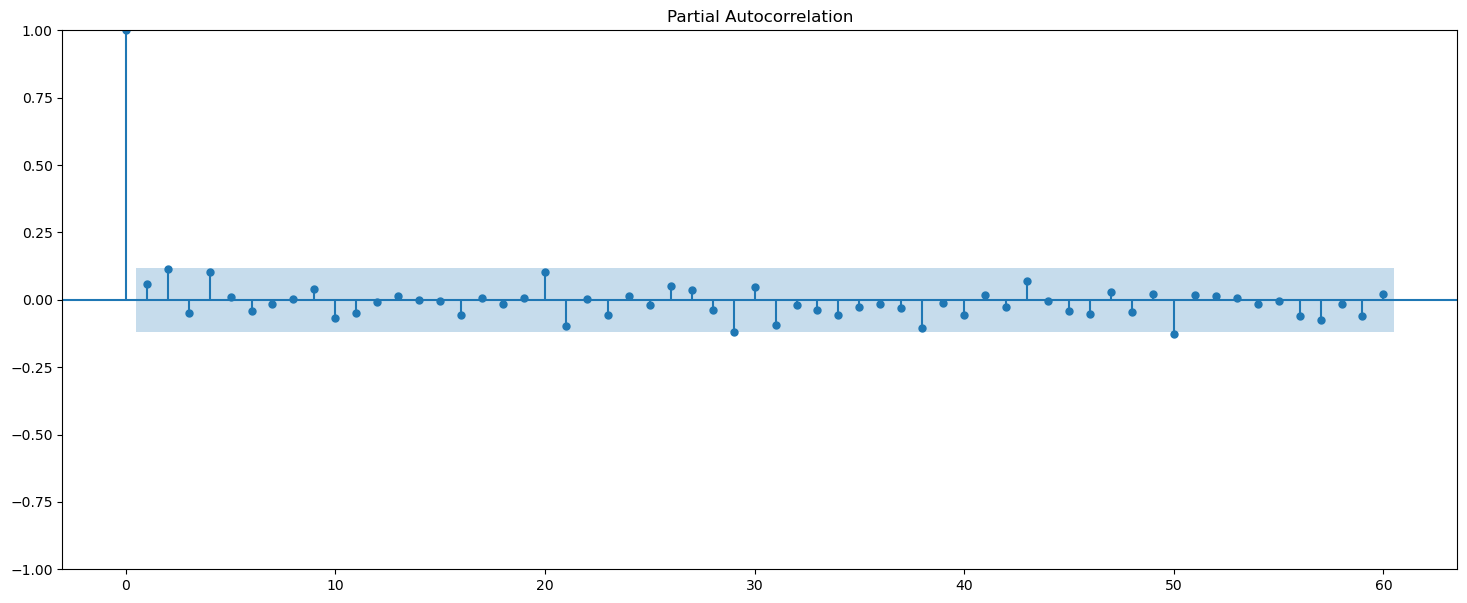

In [43]:
plot_pacf(weekly_sales,  lags = 60,);

- Seleccionamos el $p$ que minimice AIC o BIC según tu criterio

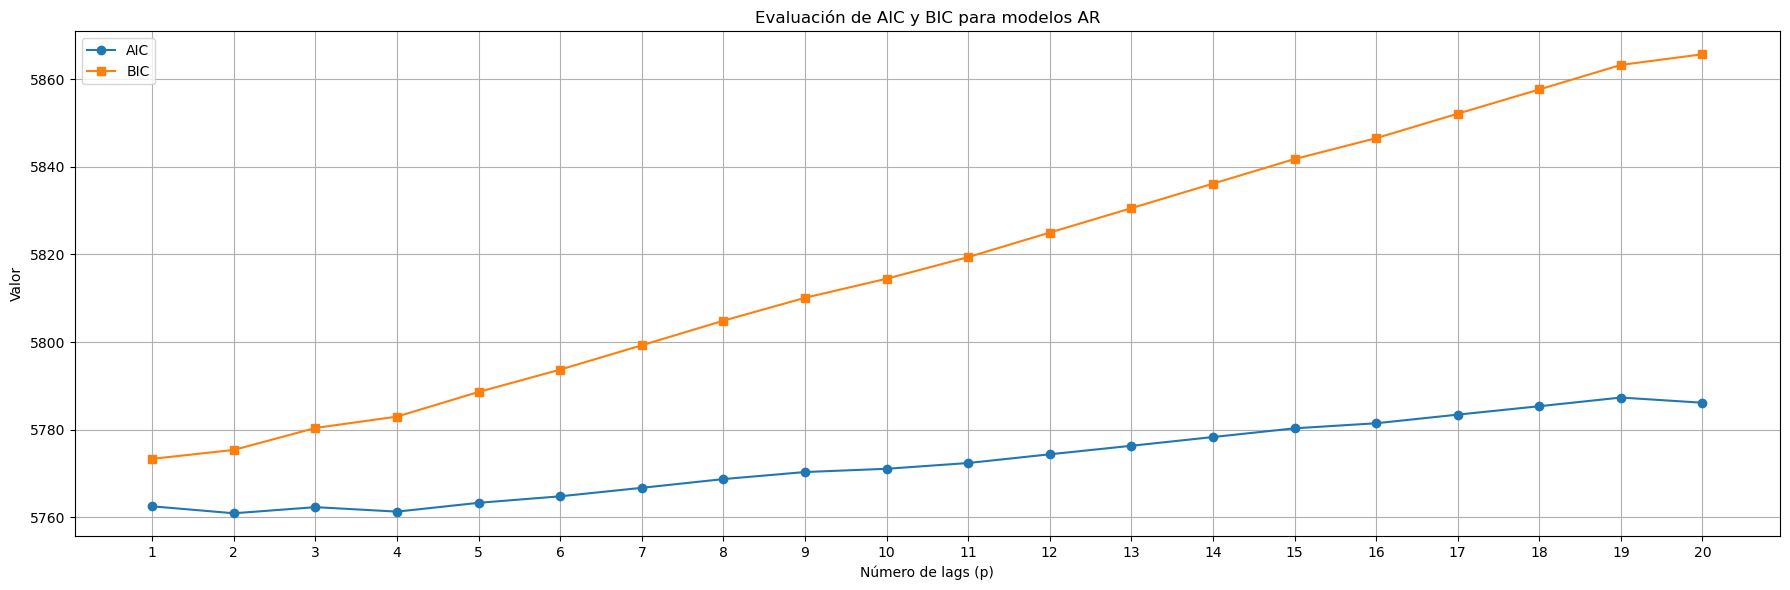

In [44]:
plt.figure(figsize=(18, 6))
plt.plot(df_resultados['lag'], df_resultados['AIC'], label='AIC', marker='o')
plt.plot(df_resultados['lag'], df_resultados['BIC'], label='BIC', marker='s')

# Mostrar todos los valores de p (lags) como ticks
plt.xticks(ticks=df_resultados['lag'])

plt.xlabel('Número de lags (p)')
plt.ylabel('Valor')
plt.title('Evaluación de AIC y BIC para modelos AR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Una vez que hemos seleccionado la cantidad de termino que lleva el modelo podemos realizar nuestro modelo.

Recordemos que la series es estacionaria

## `Modelo AR(2)`

In [45]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model_ar = ARIMA(weekly_sales["Revenue"], order = (2,0,0))  
#model = ARIMA(weekly_venta_log, order=(2,0,0)) 

# Entrenar el modelo
ar_fit = model_ar.fit()

# Resumen del modelo
print(ar_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  274
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2876.479
Date:                Thu, 10 Jul 2025   AIC                           5760.957
Time:                        09:06:32   BIC                           5775.410
Sample:                    01-06-2020   HQIC                          5766.758
                         - 03-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.363e+04    648.810    128.890      0.000    8.24e+04    8.49e+04
ar.L1          0.0531      0.058      0.918      0.359      -0.060       0.167
ar.L2          0.1148      0.059      1.958      0.0

In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar modelo AR(2) sin constante
ar_model2 = ARIMA(weekly_sales["Revenue"], order=(2, 0, 0), trend = 'n') # incluye constante; usa 'n' si no la quieres   trend='n'
#modelo = ARIMA(weekly_venta_log, order=(1, 0, 0),)
ar_fit2 = ar_model2.fit()

# Ver resumen del modelo
print(ar_fit2.summary())


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  274
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2921.470
Date:                Thu, 10 Jul 2025   AIC                           5848.941
Time:                        09:06:33   BIC                           5859.780
Sample:                    01-06-2020   HQIC                          5853.291
                         - 03-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4646      0.052      8.857      0.000       0.362       0.567
ar.L2          0.5299      0.052     10.255      0.000       0.429       0.631
sigma2      1.056e+08   9.03e-12   1.17e+19      0.0

In [47]:
#modelo_fit.resid.iloc[1:]

## Analisis de los residuales

Los residuales representan los errores de predicción del modelo, es decir, la parte de la serie temporal que el modelo no pudo explicar. En un modelo ideal, los residuales deberían comportarse como ruido blanco, lo que significa que son:

No correlacionados: Sin patrones sistemáticos (autocorrelación cero).
Media cero: No presentan sesgo sistemático.
Varianza constante: Homocedásticos, sin cambios en la variabilidad a lo largo del tiempo.

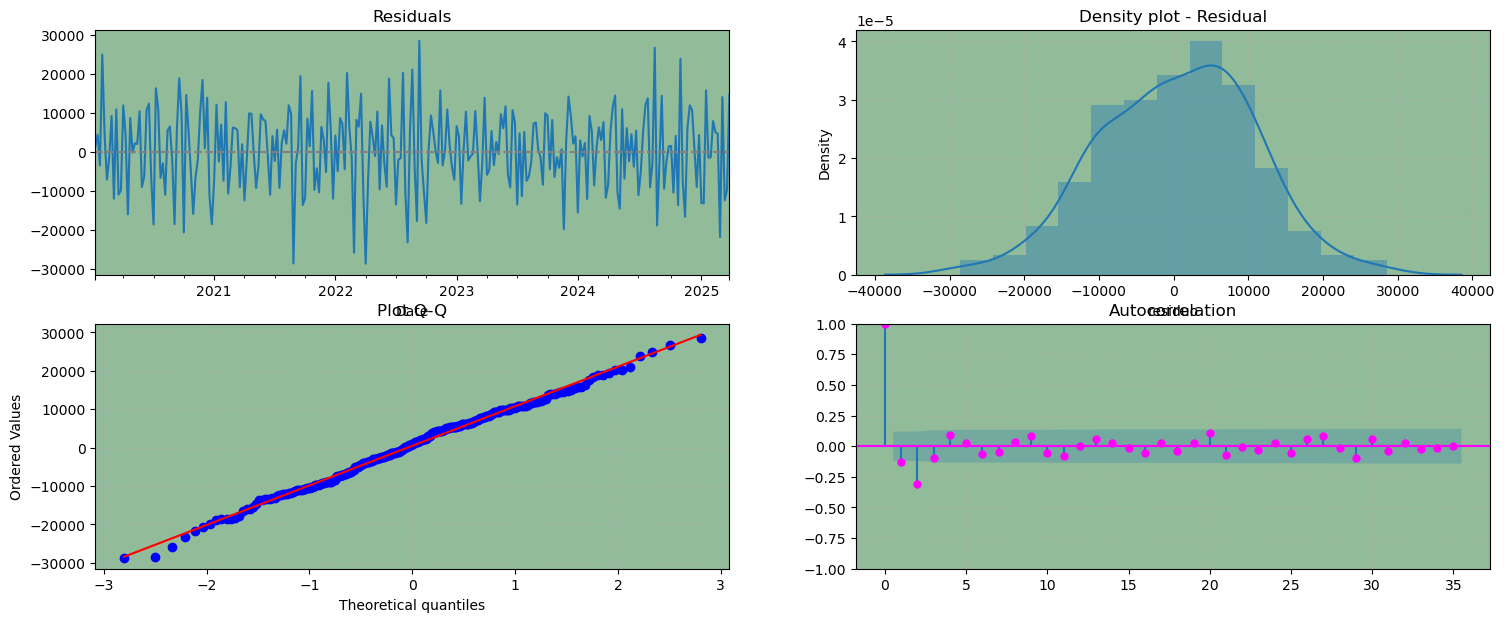

In [49]:
import scipy.stats as stats

residuales =pd.DataFrame(ar_fit2.resid.iloc[1:], columns = ["residuo"])

fig, axs = plt.subplots(nrows=2, ncols=2)

# Cambiar fondo de cada subplot
for ax in axs.flat:
    ax.set_facecolor("#91BB99")  # color amarillo claro
    ax.grid(True, linestyle='--', alpha=0.6)  # grilla activada
    ax.set_axisbelow(True)                   # Grilla detrás de los datos

    
# plot[1,1]
residuales["residuo"].plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");
axs[0,0].axhline(0, linestyle='--', color='gray')

# plot
sns.distplot(residuales["residuo"], ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residuales["residuo"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residuales["residuo"],  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

## `Forecasting`

In [59]:
# forecast

# forecast = arima.forecast(steps = 5)
forecast = ar_fit2.forecast(steps = 15)
forecast

2025-04-07    75036.944606
2025-04-14    78272.912775
2025-04-21    76131.440269
2025-04-28    76851.340235
2025-05-05    76050.971527
2025-05-12    76060.610578
2025-05-19    75640.944629
2025-05-26    75451.070288
2025-06-02    75140.455931
2025-06-09    74895.519044
2025-06-16    74617.112280
2025-06-23    74357.959835
2025-06-30    74090.016303
2025-07-07    73828.191876
2025-07-14    73564.551751
Freq: W-MON, Name: predicted_mean, dtype: float64

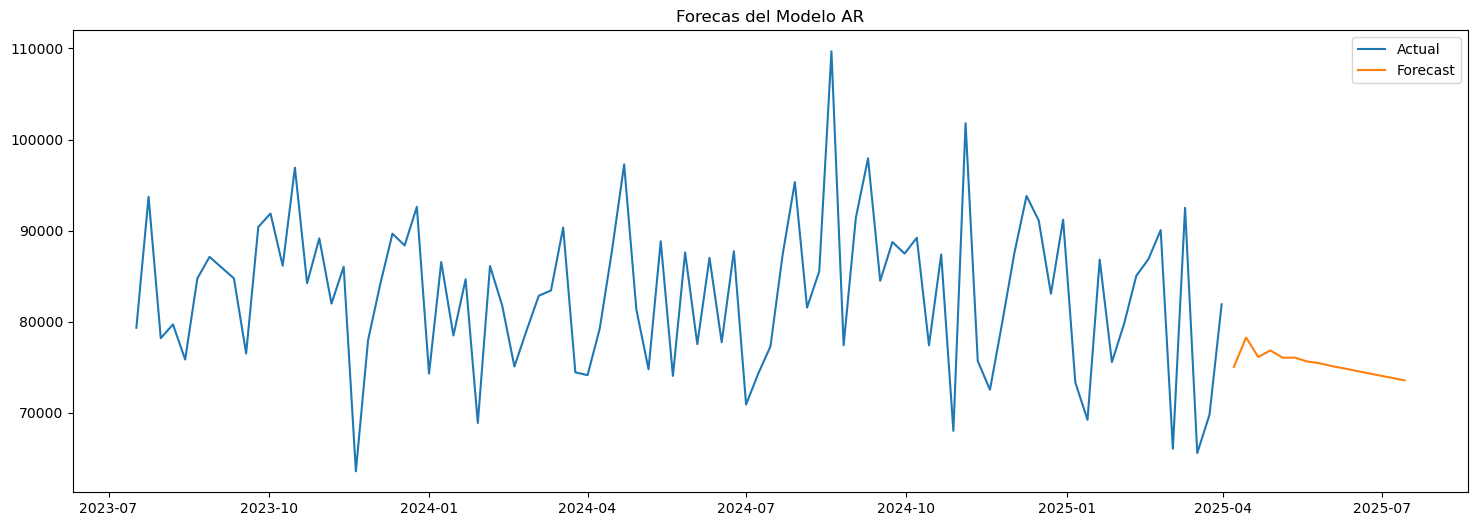

In [60]:
# plot forcasting
plt.figure(figsize=(18,6))
plt.plot(weekly_sales[-90:], label='Actual')
#plt.plot(weekly_venta_log[-90:], label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('Forecas del Modelo AR')
plt.legend()
plt.show()


## `Evaluar el modelo`

In [61]:
# split to train and test
train = weekly_sales[:int(0.9*len(weekly_sales))]
test = weekly_sales[int(0.9*len(weekly_sales)):]

train.shape, test.shape

((246, 1), (28, 1))

In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np

# train ARIMA
ar_model3 = ARIMA(train, order=(2,0,0), trend='n')
ar_fit3 = ar_model3.fit()
ar_pred3 = ar_fit3.forecast(steps= len(test))


#  RMSE
ar_rmse3 = np.sqrt(mean_squared_error(test, ar_pred3))

print(f'ARIMA RMSE: {ar_rmse3}')


ARIMA RMSE: 9379.940995641826


In [ ]:
arima_pred = ar_fit3.forecast(steps= 15)

plt.figure(figsize=(18,6))
plt.plot(train, label = "Historico - Train")
#plt.plot(test, label='test')
plt.plot(arima_pred, label='Forecast')
plt.title('test VS arima_pred')
plt.legend()
plt.show()

## `Modelo SAR`

In [63]:
weekly_sales

,Revenue
Date,
2020-01-06,71848.56
2020-01-13,72416.18
2020-01-20,76152.42
2020-01-27,70306.73
2020-02-03,98011.64
...,...
2025-03-03,66065.44
2025-03-10,92509.57
2025-03-17,65590.53


In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sar_model= SARIMAX(train, order=(2,0,0), seasonal_order=(2,0,0,52))
sar_fit = sar_model.fit()
print(sar_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                  246
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 52)   Log Likelihood               -2617.834
Date:                            Mon, 07 Jul 2025   AIC                           5245.667
Time:                                    20:24:32   BIC                           5263.194
Sample:                                01-06-2020   HQIC                          5252.724
                                     - 09-16-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4671      0.060      7.773      0.000       0.349       0.585
ar.L2          0.5250      0.059   

In [82]:
sar_forecast = sar_fit.forecast(steps= 28)
sar_forecast

2024-09-23    90233.412789
2024-09-30    84613.191685
2024-10-07    86684.388255
2024-10-14    87038.458175
2024-10-21    86427.628097
2024-10-28    86026.561237
2024-11-04    84843.697332
2024-11-11    87264.774899
2024-11-18    83157.569883
2024-11-25    84995.870045
2024-12-02    86221.452887
2024-12-09    85984.536356
2024-12-16    85097.009972
2024-12-23    84222.033947
2024-12-30    83747.236484
2025-01-06    84213.474777
2025-01-13    81266.844986
2025-01-20    82506.320658
2025-01-27    81780.327907
2025-02-03    82020.835625
2025-02-10    81569.515361
2025-02-17    80429.607871
2025-02-24    82087.957388
2025-03-03    81173.085538
2025-03-10    79436.913463
2025-03-17    79979.403236
2025-03-24    80198.375285
2025-03-31    77922.002757
Freq: W-MON, Name: predicted_mean, dtype: float64

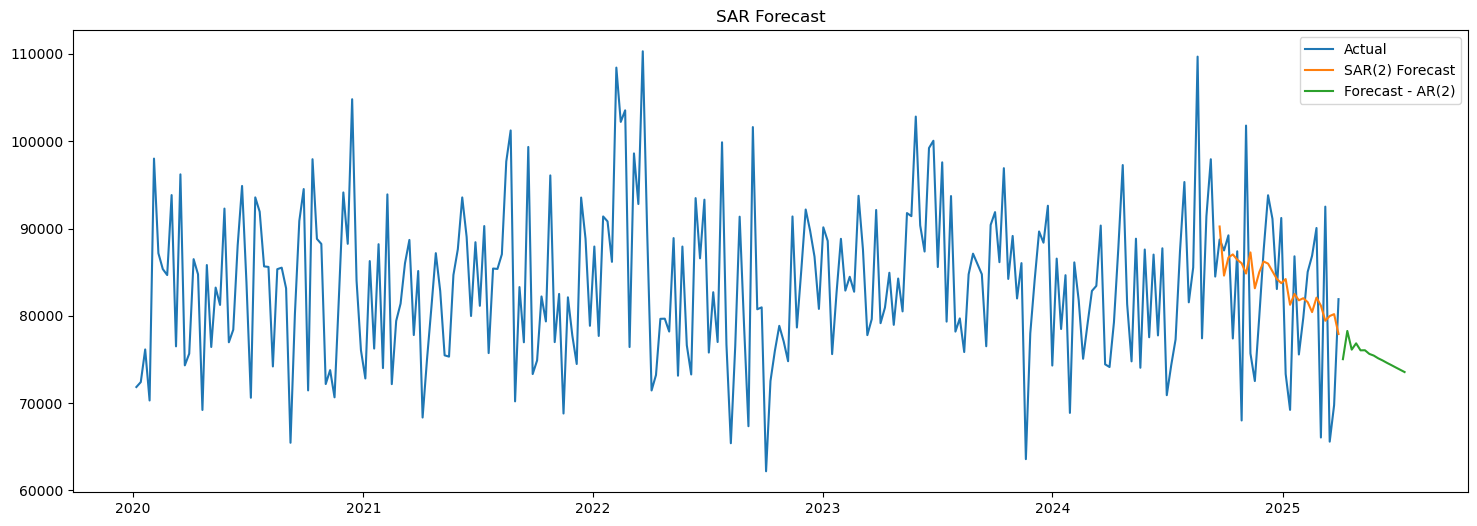

In [83]:
# plot forcast
plt.figure(figsize=(18,6))
plt.plot(weekly_sales, label='Actual')
plt.plot(sar_forecast, label='SAR(2) Forecast')
plt.plot(forecast, label='Forecast - AR(2)')
plt.title('SAR Forecast')
plt.legend()
plt.show()

In [84]:
#  RMSE
sar_rmse = np.sqrt(mean_squared_error(test, sar_forecast))

print(f'ARIMA RMSE: {sar_rmse}')

ARIMA RMSE: 9111.691565346877


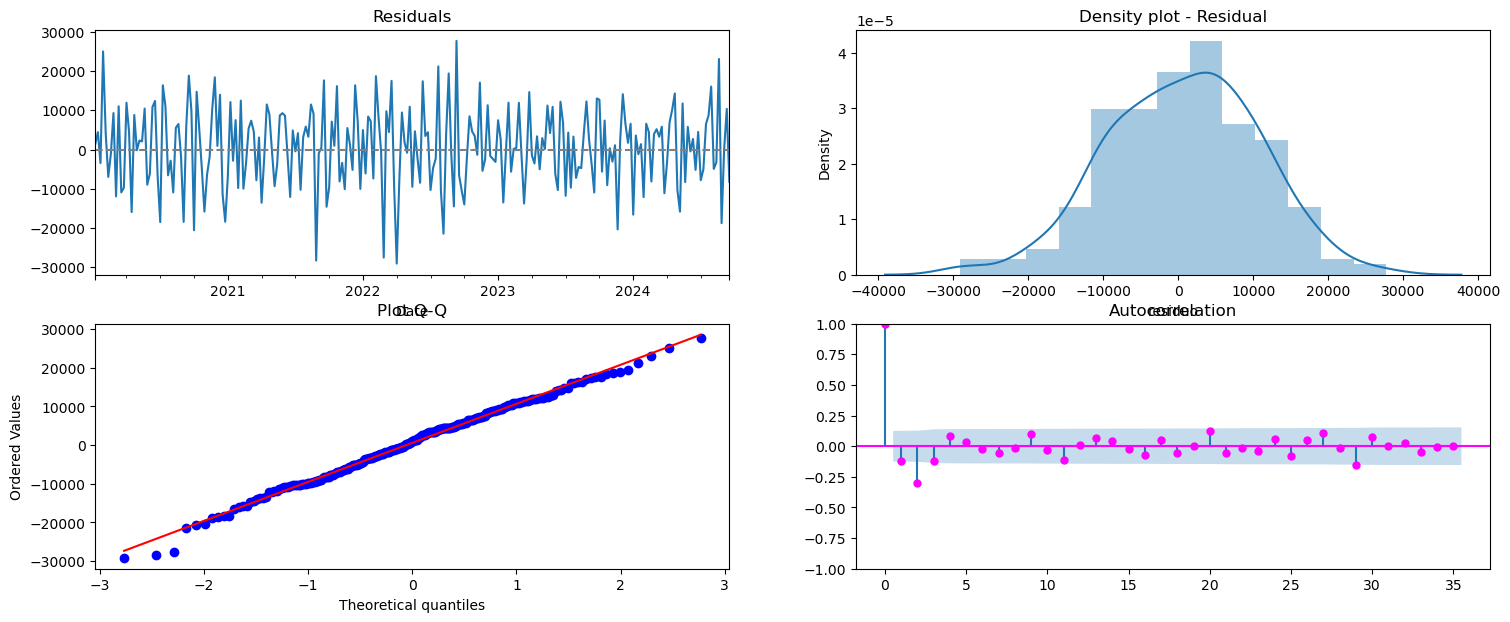

In [85]:
import scipy.stats as stats

residuales_sar =pd.DataFrame(sar_fit.resid.iloc[1:], columns = ["residuo"])

fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residuales_sar["residuo"].plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");
axs[0,0].axhline(0, linestyle='--', color='gray')

# plot
sns.distplot(residuales_sar["residuo"], ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residuales_sar["residuo"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residuales_sar["residuo"],  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

## `Modelo SAR(2)X con variable exógena`

In [86]:
df

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Monthly
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,2020-01
15,2020-01-06,Electrolyte Powder,Hydration,154,35.92,5531.68,0.04,2,USA,Amazon,2020-01
14,2020-01-06,Iron Supplement,Mineral,149,42.97,6402.53,0.22,2,Canada,iHerb,2020-01
13,2020-01-06,Green Tea Extract,Fat Burner,143,31.88,4558.84,0.06,3,UK,Walmart,2020-01
12,2020-01-06,Biotin,Vitamin,159,28.79,4577.61,0.10,1,UK,iHerb,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
4369,2025-03-31,Vitamin C,Vitamin,157,57.08,8961.56,0.20,2,UK,iHerb,2025-03
4368,2025-03-31,Whey Protein,Protein,148,15.17,2245.16,0.07,1,UK,Amazon,2025-03
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon,2025-03
4374,2025-03-31,Creatine,Performance,174,35.63,6199.62,0.03,0,Canada,Amazon,2025-03


In [87]:
df.columns

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform', 'Monthly'],
      dtype='object')

In [88]:
weekly_sales = df.groupby('Date')[['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned',]].mean()
weekly_sales

,Units Sold,Price,Revenue,Discount,Units Returned
Date,,,,,
2020-01-06,150.3750,30.030000,4490.535000,0.105000,1.1875
2020-01-13,148.3750,30.635000,4526.011250,0.147500,1.6875
2020-01-20,148.1250,32.201250,4759.526250,0.131250,1.6250
2020-01-27,149.8125,29.541250,4394.170625,0.097500,1.8125
2020-02-03,149.0000,41.171250,6125.727500,0.133125,2.1250
...,...,...,...,...,...
2025-03-03,151.9375,26.653750,4129.090000,0.126875,2.2500
2025-03-10,150.6875,38.200625,5781.848125,0.113750,1.8750
2025-03-17,148.8125,27.882500,4099.408125,0.091875,1.3750


### `Interpretación del VIF`

El VIF indica cuánto aumenta la varianza de un coeficiente de regresión debido a la correlación con otras variables predictoras. Los umbrales comunes son:
- VIF < 5: Sin multicolinealidad significativa.

- 5 < VIF < 10: Multicolinealidad moderada, tolerable en algunos casos.

- VIF > 10: Multicolinealidad alta, problemática para modelos lineales.

In [113]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suponiendo tus datos imputados (data_imputed del código anterior)
reduced_vars = ['Units Sold', 'Price', 'Discount', 'Units Returned']
X_reduced = df[reduced_vars]

vif_reduced = pd.DataFrame()
vif_reduced['Variable'] = X_reduced.columns
vif_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print("VIF con variables reducidas:")
print(vif_reduced)

VIF con variables reducidas:
         Variable        VIF
0      Units Sold  11.109920
1           Price   6.769107
2        Discount   3.913634
3  Units Returned   2.515334


In [90]:
# split to train and test
train = weekly_sales[:int(0.9*len(weekly_sales))]
test = weekly_sales[int(0.9*len(weekly_sales)):]

train.shape, test.shape

((246, 5), (28, 5))

In [91]:
weekly_sales.columns

Index(['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned'], dtype='object')

In [127]:
sarx_model = SARIMAX(weekly_sales["Revenue"], 
                       exog = weekly_sales[[ 'Price',  'Units Returned']], # variable exogena
                       order=(1,0,0),  # parte no estacional
                       seasonal_order=(1,0,0,52)) # SAR(2) con periodo 52
sarx_fit = sarx_model.fit()
#sarima_pred = sarima_fit.forecast(steps=len(test), exog = test["Price"])
sarx_pred = sarx_fit.predict(start = "2024-09-23", end = "2025-03-31" , exog = test[[ 'Price',  'Units Returned']])
sarx_pred

2024-09-23    5568.201255
2024-09-30    5517.373811
2024-10-07    5727.874828
2024-10-14    4802.327557
2024-10-21    5469.791909
2024-10-28    4335.072311
2024-11-04    6023.304148
2024-11-11    4655.322898
2024-11-18    4523.926837
2024-11-25    4869.179250
2024-12-02    5576.770800
2024-12-09    5790.517705
2024-12-16    5601.811787
2024-12-23    5152.074416
2024-12-30    5685.357577
2025-01-06    4598.919261
2025-01-13    4314.754873
2025-01-20    5375.231683
2025-01-27    4820.852589
2025-02-03    4898.259101
2025-02-10    5404.788272
2025-02-17    5560.049932
2025-02-24    5690.340469
2025-03-03    4035.777936
2025-03-10    5751.814087
2025-03-17    4197.352454
2025-03-24    4435.778228
2025-03-31    5064.268880
Freq: W-MON, Name: predicted_mean, dtype: float64

In [128]:
sarima_rmse = np.sqrt(mean_squared_error(test["Revenue"], sarx_pred))
print(f'SARIMA RMSE: {sarima_rmse}')


SARIMA RMSE: 98.84926742837284


|Exogena|Metrica|
|-------|-------|
|1|500.11|
|2|100.30|
|3|99.81|
|4|99.19|

'Units Sold', 'Price', 'Units Returned'
|3| 99.19

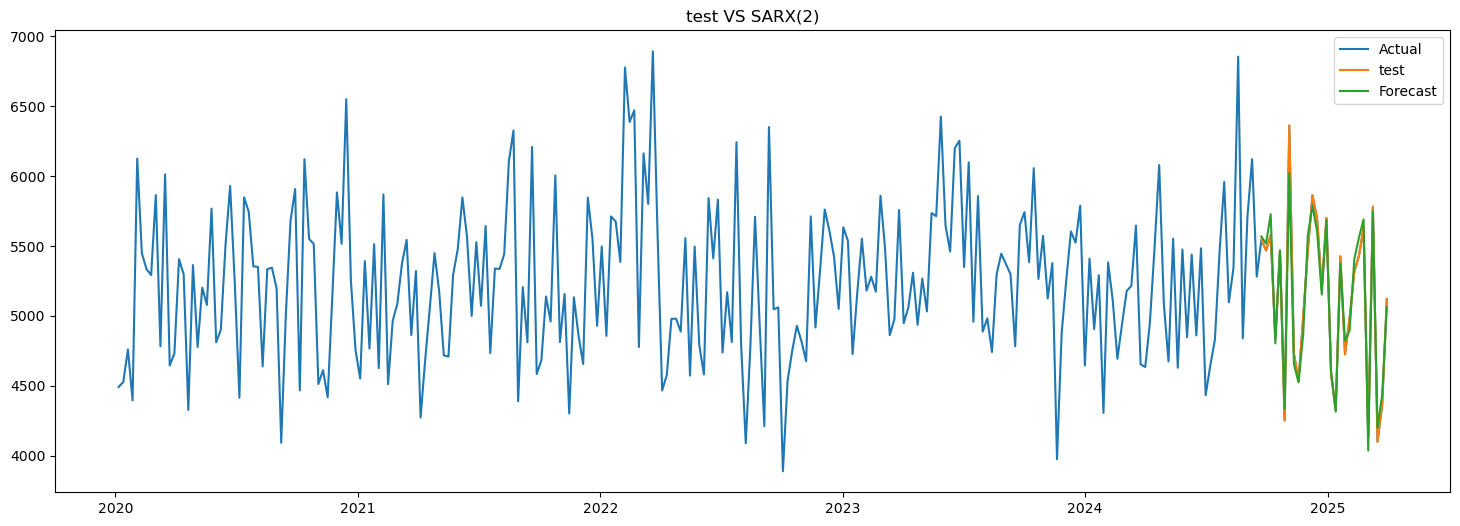

In [129]:
plt.figure(figsize=(18,6))
plt.plot(weekly_sales["Revenue"], label='Actual')
plt.plot(test["Revenue"], label='test')
plt.plot( sarx_pred, label='Forecast')
plt.title('test VS SARX(2)')
plt.legend()
plt.show()

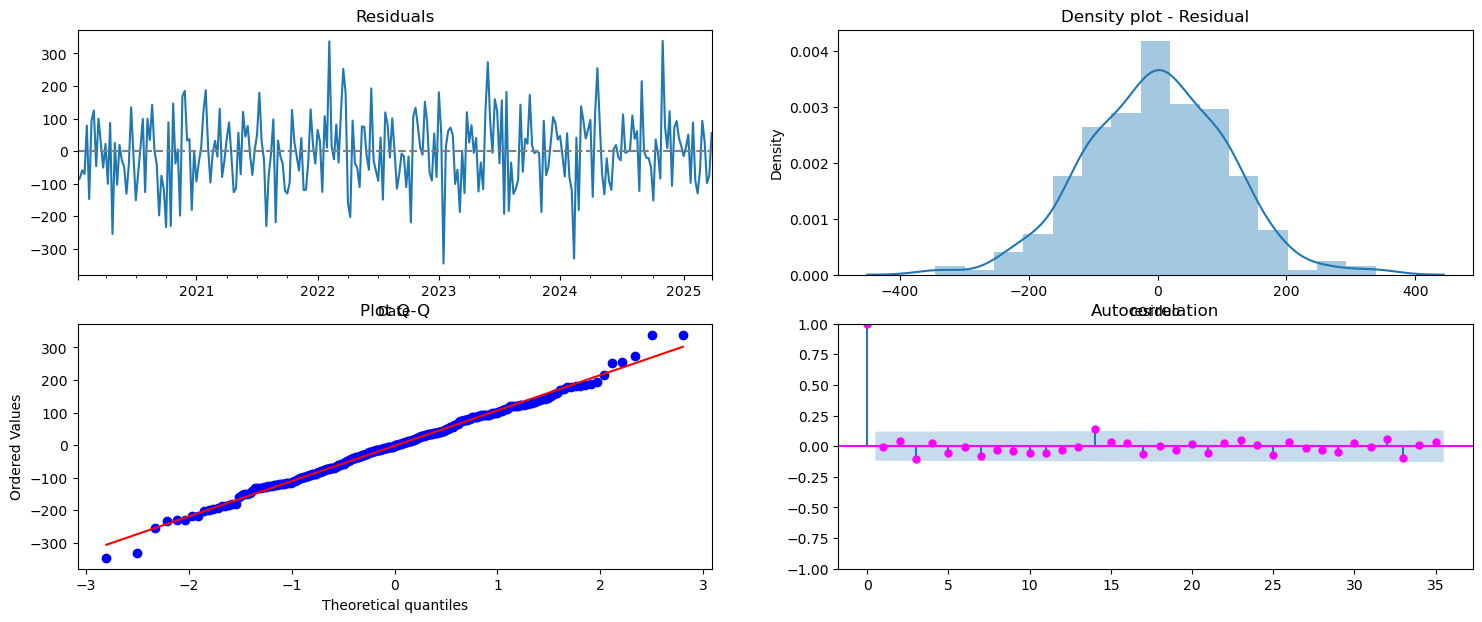

In [130]:
import scipy.stats as stats

residuales_sarx =pd.DataFrame(sarx_fit.resid.iloc[1:], columns = ["residuo"])

fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residuales_sarx["residuo"].plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");
axs[0,0].axhline(0, linestyle='--', color='gray')

# plot
sns.distplot(residuales_sarx["residuo"], ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residuales_sarx["residuo"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residuales_sarx["residuo"],  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();